<a href="https://colab.research.google.com/github/Idan-Garay/AIR/blob/main/Twitter_Thesis_Project%20experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn vaderSentiment snscrape


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []
search_query = "Inflation Philippines geocode:12.48000,123.17582,800km until:2022-12-31 since:2022-06-01"

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Inflation until:2023-01-13 since:2022-06-01 geocode:12.48000,123.17582,800km').get_items()):
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
tweets_df2

In [ ]:
!pip install translator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tweets_df2.to_csv("dataset_twitter.csv")

In [ ]:
df = pd.read_csv("dataset_twitter.csv")
df["Text"].size

2338

In [ ]:
text_df = df[["Text"]].head(1500)

In [ ]:
print(text_df.Text[1])

Isnt it a little too late?  Your inflation targeting sucks! More than 4 months Pinoy consumers has to bear high food prices. #inflationrate

Philippines to boost onion imports to help inflation-hit consumers https://t.co/r5vSt5MbGa via @Interaksyon


In [ ]:
from sklearn.cluster import Birch
from sklearn.feature_extraction.text import TfidfVectorizer

# preprocess dataset
  # translate tagalog to english
  # TFIDF the documents
  # apply clustering
  # sentiment analyzer

vectorizer = TfidfVectorizer()

X_tfidf = vectorizer.fit_transform(text_df.Text)
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")


n_samples: 1500, n_features: 5976


In [ ]:
brc = Birch(n_clusters=5)
brc_result = brc.fit_predict(X_tfidf)

# label = brc_result.predict()

In [ ]:
# print(X_tfidf[:,0])
# print('here')
# print(X_tfidf[:,1])
pddf = pd.DataFrame(data=brc_result)


In [ ]:
!pip install translators fasttext-langdetect snscrape nltk re

In [ ]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 KB 3.1 MB/s eta 0:00:00


In [ ]:
import snscrape.modules.twitter as sntwitter
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Inflation since:2023-01-17 geocode:12.71086,123.25827,785km').get_items()):
    tweets_list2.append([tweet.date, tweet.id, tweet.content,  tweet.user.username, tweet.user.location])


,Datetime,Tweet Id,Text,Username,Location
0,2023-01-17 00:30:14+00:00,1615144430121652226,World equities mainly rose Monday on growing g...,philstarbiznews,Philippines


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
tweets_list2 = []
# search_query = "Inflation Philippines geocode:12.48000,123.17582,800km until:2022-12-31 since:2022-06-01"
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Inflation until:2023-01-17 since:2022-06-01 geocode:12.71086,123.25827,785km').get_items()):
    tweets_list2.append([tweet.date, tweet.id, tweet.content,  tweet.user.username, tweet.user.location])
    
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username', 'Location'])
filteredLocations = ['Dallas, TX', 'Austria','Sawat','Hawaii', 'Hawai\'i', 'Turtle Island', 'Tribunal', 'España', 'El Salvador', 'intp-t', 'Kyoto-shi, Japan', 'espanya', 'Kuala Lumpur Federal Territory', 'Elantris', 
'Hollywood, FL.', 'Tennessee, USA', 'Wien, Österreich', 'South Tipperary, Ireland', 'Gotham City', 'Abu Dhabi', 'United Arab Emirates']


tweets_df2 = tweets_df2[tweets_df2["Location"].str.contains('|'.join(filteredLocations))==False]
tweets_df2 = tweets_df2.drop_duplicates(subset="Text", keep="first")
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)
tweets_df2.to_csv("dataset_twitter_unique.csv")


In [ ]:
!pip install contractions

In [ ]:
import contractions

tweets_df2['Text'] = tweets_df2['Text'].str.replace(r'http\S+|www.\S+', '', case=False, regex=True)
tweets_df2['Text'] = tweets_df2['Text'].str.replace(r'@[A-Za-z0-9]+\s?', '', regex=True)
tweets_df2['Text'] = tweets_df2['Text'].str.replace(r'#[A-Za-z0-9]+', '', regex=True)
tweets_df2 = tweets_df2.drop_duplicates(subset="Text", keep="first")
tweets_df2['Text'] = tweets_df2['Text'].apply(lambda tweet: contractions.fix(tweet))
tweets_df2['Text'].head(15)
tweets_df2.to_csv("dataset_twitter_unique_unmention.csv")

In [ ]:
tweets_df2.to_csv("dataset_twitter_unique_unmention.csv")

In [ ]:
import pandas as pd 
import translators as ts
import translators.server as tss
from ftlangdetect import detect
import nltk
from nltk.corpus import stopwords

# nltk.download('punkt')
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# def translateNonEnglishText(arrayOfWords):
#   print(arrayOfWords)
#   newArrayOfWords = []
#   for word in arrayOfWords:
#     x = detect(text=word, low_memory=True)
#     if x['lang'] != 'en':
#       langToUse = 'tl' if x['lang'] == 'tl' else 'ceb'
#       print(x['lang'])
#       newArrayOfWords.append(tss.google(word, langToUse, 'en') )
#     else:
#       newArrayOfWords.append(word)
#   return newArrayOfWords

def translateNonEnglishText(text):
  x = detect(text=text, low_memory=True)
  # if x['lang'] != 'en':
  langToUse = 'tl' if x['lang'] == 'tl' else 'ceb'
  return tss.google(text, langToUse, 'en')
  
df = pd.read_csv("dataset_twitter_filtered.csv")
df["Text"] = df["Text"].apply(lambda text: translateNonEnglishText(text.replace("\n"," "))) # dont tokenize yet

# df["Text"].head()
# for each text: detect language and translate each word if not english using tss.google(word, result["lang"], "en")
# TF-IDF




In [ ]:
df.to_csv('dataset_twitter_filtered_translated.csv')

In [ ]:
import nltk
dfText = df["Text"].head(10)
nltk.download('punkt')

res = dfText.apply(lambda row: nltk.word_tokenize(row))
res

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [@, Jim_Jordan, What, a, bout, inflation, ?, O...
1    [@, RepJeffries, Inflation, isn, ’, t, down, ....
2    [@, TheWuhanClan, @, LizAnnSonders, a, pause, ...
3    [Itong, si, aclang, Ogie, ,, halatang, 'di, up...
4    [@, umee_intern, Bullish, on, the, inflation, ...
5    [@, BernaldoDQuiros, @, jzuazola, @, CTajadura...
6    [@, Wnschmstr, Der, Bärenmarkt, ist, mit, der,...
7    [@, jzuazola, @, BernaldoDQuiros, @, CTajadura...
8    [@, MillennialOfMNL, They, ’, re, not, babies,...
9    [@, jzuazola, @, BernaldoDQuiros, @, CTajadura...
Name: Text, dtype: object

                                                Text
0  What about inflation?\nOh Biden is taking care...
1  Inflation isn’t down. The rate of inflation is...
2                              a pause in inflation?
3  This gay Ogie. It's obvious he's outdated on w...
4               Bullish on the inflation in general.
[4 4 0 ... 4 0 2]


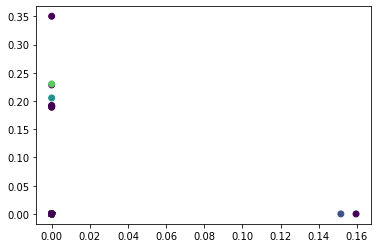

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

df = pd.read_csv("dataset_twitter_filtered_translated.csv")


text_df = df[["Text"]]
print(text_df.head(5))

sampleVectorizer = TfidfVectorizer()
X = sampleVectorizer.fit_transform(
    text_df.Text
)

kmeans = KMeans(n_clusters=5).fit(X)
print(kmeans.labels_)
plt.scatter(X[:,0].toarray(), X[:,1].toarray(), c=kmeans.fit_predict(X))

# So next step will be to use your bag of words vectorizer to get the feature names using features = bow_vect.get_feature_names() 
#.   and assign them corresponding labels that you obtained above.
# Using a for loop iterate over your data and make list[s] that contains words corresponding to each label. 
#. Just pass these list[s] as text to your WordCloud class with any customization that you may need.




In [ ]:
!pip install tweet-preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# preprocess Dataset
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
# import preprocessor as p

# p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.MENTION)
# df["Text"] = df["Text"].apply(lambda tweet: p.clean(tweet) )

# nltk.download('stopwords')
# nltk.download('punkt')
pd.set_option('display.max_colwidth', None)
stopwords = set(stopwords.words('english'))
stopwords.add('they\'re')
stopwords.add('here\'s')
stopwords.add('he\'s')
stopwords.add('I\'m')
stopwords.add('really')
stopwords.add('very')
stopwords.add('always')
stopwords.add('whose')
stopwords.add('always')
stopwords.add('oh')
stopwords.add('haha')
stopwords.add('whatever')
stopwords.add('jan')
stopwords.add('gotten')
df = pd.read_csv("dataset_twitter_manual_translation.csv")

# lemmatize
nltk.download('wordnet')
nltk.download('omw-1.4')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

specialSymbols = ['.', '?', ',', '%', '!', ';', '|', 'percent']

df["Text"] = df["Text"].apply(lambda tweet: tweet.strip().lower().replace('\'', " "))

for symbol in specialSymbols:
  df["Text"] = df["Text"].apply(lambda tweet: tweet.replace(symbol, " "))

df["Text"] = df["Text"].str.replace('\d+', '', regex=True)
df["Text"] = df["Text"].apply(lambda tweet: w_tokenizer.tokenize(tweet))
df["Text"] = df["Text"].apply(lambda words: [word for word in words if word not in (stopwords)])
df["Text"] = df["Text"].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df["Text"] = df["Text"].apply(lambda words: ' '.join(words))

In [ ]:

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics

# df["Text"] = df["Text"].apply(lambda tweet: ' '.join([word for word in tweet if word not in (stopwords) or len(word) != 1]))
# get X

# df2 = pd.read_csv("dataset_twitter_manual_translation.csv")
sampleVectorizer = TfidfVectorizer()
X = sampleVectorizer.fit_transform(
    df["Text"]
)

# get range of clusters & store models to a list
kmeans_models = [(ith,KMeans(n_clusters=ith).fit(X)) for ith in range(2, 16)]

# traverse list and store silhouette score
silhouette_scores = [ (ith, metrics.silhouette_score(X, model.labels_, metric='euclidean')) for (ith, model) in kmeans_models]

# kmeans_model = KMeans(n_clusters=3, random_state=1).fit(X)
# labels = kmeans_model.labels_
# metrics.silhouette_score(X, labels, metric='euclidean')
# pd.set_option('display.max_colwidth', None)

[1925.3953185195032, 1916.1206525118475, 1907.895896366549, 1899.6406503942658, 1894.8222857462363, 1886.7616722293624, 1881.510984052325, 1876.2276473779896, 1869.584504121185, 1863.9530969137702, 1857.0402381844533, 1855.06645423808, 1852.6035720380005, 1845.0870223804197]


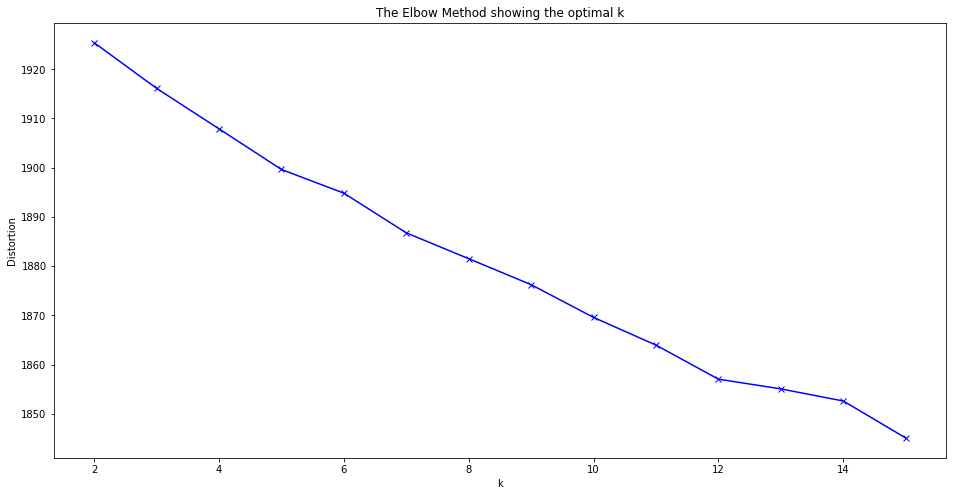

In [ ]:
distortions = [model.inertia_ for (n_clusters, model) in kmeans_models]
print(distortions)
# silhouette_scores
plt.figure(figsize=(16,8))
plt.plot(range(2, 16), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

(2, 0.005235057202318796)
(3, 0.006433003212022931)
(4, 0.007206185639993071)
(5, 0.00411223848537566)
(6, 0.006300063232179073)
(7, 0.0078110449263350335)
(8, 0.008785239781274398)
(9, 0.008299094659176899)
(10, 0.011053524669007041)
(11, 0.00912511526679021)
(12, 0.010908635283412063)
(13, 0.011582142686869423)
(14, 0.010705000275835689)
(15, 0.013213796268102086)


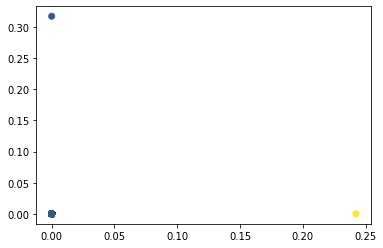

12
Cluster 0: real inflation expensive era jollibee terrible going still peso stupid went wage christmas gosh year more save meal golden bbm
Cluster 1: highest since december november vegetable inflation rate recorded reached level mapa psa philippine according february crisis statistician dennis financial national
Cluster 2: inflation philippine high bad price terrible year consumer see december report expensive feel oreo_inflation said also think suck even go
Cluster 3: still inflation know like people country say high affected price also president government even philippine good money time world feel
Cluster 4: price food december increase faster inflation vegetable psa restaurant year higher service high accelerated rate due beverage alcoholic mainly good
Cluster 5: increase salary inflation rate year government price teacher urged soar wage need fee share make cannot group worker due hike
Cluster 6: bsp target governor medalla inflation felipe year said likely monetary action poli

In [ ]:

for x in silhouette_scores:
 print(x) 
import matplotlib.pyplot as plt
 
#plotting the results
plt.scatter(X[:,0].toarray(), X[:,1].toarray(), c=kmeans_models[10][1].labels_)
plt.show()

centroids = kmeans_models[10][1].cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = sampleVectorizer.get_feature_names()
# true_k = len(np.unique(kmeans.labels_))
print(kmeans_models[10][0])
for i in range(kmeans_models[10][0]):
    print("Cluster %d:" % i, end='')
    for ind in centroids[i, :20]:
        print(' %s' % terms[ind], end='')
    print()

In [ ]:
import matplotlib.pyplot as plt
 
#plotting the results
plt.scatter(X_tfidf[:,0].toarray(), X_tfidf[:,1].toarray(), c=brc_result)
plt.show()
print(len(X_tfidf[:,0].toarray()))
print(len(X_tfidf[:,1].toarray()))



In [ ]:
from snscrape.modules.twitter import TwitterSearchScraper 
maxTweets = 10
tweets_list = []    


for i,tweet in enumerate(TwitterSearchScraper('elon musk').get_items()):        
    if i>maxTweets:
        break
    tweets_list.append({
        "date": tweet.date,
        "id":tweet.id,
        "content":tweet.content,
        "username":tweet.user.username
        })

NameError: ignored

# New Section

ImportError: ignored

In [ ]:
for tweet in result.data:
  print(tweet)

RT @rapplerdotcom: Egg prices in the Philippines have gone up by 45% due to a domino effect of inflationary pressures from other goods and…
RT @TIME: The cost of a kilogram of onions is greater than the minimum wage for a day’s work in the Philippines https://t.co/OIXeOizXE8
RT @TIME: The cost of a kilogram of onions is greater than the minimum wage for a day’s work in the Philippines https://t.co/OIXeOizXE8
RT @TIME: The cost of a kilogram of onions is greater than the minimum wage for a day’s work in the Philippines https://t.co/OIXeOizXE8
RT @TIME: In the Philippines, onions are now more expensive than meat. Here's why https://t.co/VZnJCfrzD6
RT @TIME: The cost of a kilogram of onions is greater than the minimum wage for a day’s work in the Philippines https://t.co/OIXeOizXE8
RT @TIME: The cost of a kilogram of onions is greater than the minimum wage for a day’s work in the Philippines https://t.co/OIXeOizXE8
RT @RalfRivas: Eggs, among the cheapest sources of protein for the Filipin

In [ ]:
from sklearn.cluster import Birch
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
!pip install tweetnlp

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import re
import preprocessor as p

# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

df = pd.read_csv("dataset_twitter_unique_unmention.csv")
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.EMOJI)
pd.set_option('display.max_colwidth', None)
df["Text"] = df["Text"].apply(lambda tweet: p.clean(tweet) )
# df["Text"] = df["Text"].apply(lambda tweet: ' '.join([word for word in nltk.word_tokenize(tweet) if word not in (stopwords)]))
# df["Text"] = df["Text"].apply(lambda tweet: tweet.lower())
df.head(50)

# get X
sampleVectorizer = TfidfVectorizer(lowercase=True,stop_words=stopwords,)
X = sampleVectorizer.fit_transform(
    df["Text"]
)

# get range of clusters & store models to a list
kmeans_models = [(ith,KMeans(n_clusters=ith).fit(X)) for ith in range(2, 16)]

# traverse list and store silhouette score
silhouette_scores = [ (ith, metrics.silhouette_score(X, model.labels_, metric='euclidean')) for (ith, model) in kmeans_models]


2040.2964126834943
2031.2813756536152
2022.5982002951905
2014.1276396203398
2009.433522040631
2004.4062345453744
2000.0011754167294
1993.0078834478115
1986.0917700200648
1981.7805063392589
1979.393650636352
1970.1538997716139
1968.874508587005
1970.1497052308077


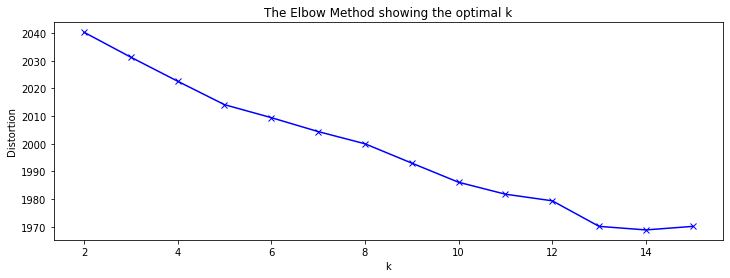

In [ ]:
distortions = [model.inertia_ for (n_clusters, model) in kmeans_models]

for x in distortions:
  print(x)
# silhouette_scores
plt.figure(figsize=(12,4))
plt.plot(range(2, 16), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
ith_model = kmeans_models[12]

#plotting the results
plt.scatter(X[:,0].toarray(), X[:,1].toarray(), c=ith_model[1].labels_)
plt.show()

centroids = ith_model[1].cluster_centers_.argsort()[:, ::-1] ## Indices of largest centroids' entries in descending order
terms = sampleVectorizer.get_feature_names_out()
# true_k = len(np.unique(kmeans.labels_))

for score in silhouette_scores:
  print(score)

for i in range(ith_model[0]):
    print("Cluster %d:" % i, end='')
    termsForCloud = ""
    for ind in centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        termsForCloud += " " + terms[ind]
    print()
    print()
    # print(termsForCloud)
    # wordcloud = WordCloud(width = 200, height = 200,
    #             background_color ='white',
    #             stopwords = stopwords,
    #             min_font_size = 2).generate(termsForCloud)
 
    # # plot the WordCloud image                      
    # plt.figure(figsize = (10, 5), facecolor = None)
    # plt.imshow(wordcloud)
    # plt.axis("off")
    # plt.tight_layout(pad = 0)
    # plt.show()


In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
!pip install nltk gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# preprocess Dataset
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

def givePreprocessedDataset():
  nltk.download('stopwords')
  nltk.download('punkt')
  pd.set_option('display.max_colwidth', None)

  stop_words = set(stopwords.words('english'))

  stop_words.add('they\'re')
  stop_words.add('here\'s')
  stop_words.add('he\'s')
  stop_words.add('I\'m')
  stop_words.add('really')
  stop_words.add('very')
  stop_words.add('always')
  stop_words.add('whose')
  stop_words.add('always')
  stop_words.add('oh')
  stop_words.add('haha')
  stop_words.add('whatever')
  stop_words.add('jan')
  stop_words.add('gotten')
  stop_words.add('aangkat')
  stop_words.add('haha')
  df = pd.read_csv("dataset_twitter_unique_unmention.csv")

  # lemmatize
  nltk.download('wordnet')
  nltk.download('omw-1.4')
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()


  df = df.dropna(subset = ['Text'])

  specialSymbols = ['.', '?', ',', '%', '!', ';', '|', 'percent', 'year','like', 'rate', 'even', 'still', 'country']

  df["Text"] = df["Text"].apply(lambda tweet: tweet.strip().lower().replace('\'', " "))

  for symbol in specialSymbols:
    df["Text"] = df["Text"].apply(lambda tweet: tweet.replace(symbol, " ")) 

  df["Text"] = df["Text"].str.replace('\d+', '', regex=True)
  df["Text"] = df["Text"].apply(lambda tweet: w_tokenizer.tokenize(tweet))
  df["Text"] = df["Text"].apply(lambda words: [word for word in words if word not in (stop_words)])
  df["Text"] = df["Text"].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
  df["Text"] = df["Text"].apply(lambda words: ' '.join(words))
  return df


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import enum
from pprint import pprint

# load data
data = givePreprocessedDataset()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Text'])
Xarray = X.toarray()

# perform hierarchical clustering

linkages = ['ward', 'complete', 'average', 'single']
aggloMetrics = ['Silhouette_score', 'DH_index','CH_index'];

def applyMetric(metric, XMatrix, cluster_labels):
  score = 0
  if metric == 'Silhouette_score':
    score = silhouette_score(XMatrix, cluster_labels)
  elif metric == 'DH_index':
    score = davies_bouldin_score(XMatrix, cluster_labels)
  elif metric == 'CH_index':
    score = calinski_harabasz_score(XMatrix, cluster_labels)
  return score

def initAggloResult(linkages, metrics):
  objResult = {}
  for linkage in linkages:
    objResult[linkage] = {}
    objResult[linkage]["models"] = []
    objResult[linkage]["metrics_scores"] = {}
    for metric in metrics:
      objResult[linkage]["metrics_scores"][metric] = []
  return objResult

#initialize object
aggloResult = initAggloResult(linkages, aggloMetrics)

maxClustersRange = 12

for linkage in linkages:
  models = []
  for x in range(2, maxClustersRange+1):
    aggloClr = AgglomerativeClustering(n_clusters=x, linkage=linkage)
    aggloClr.fit(Xarray)
    models.append(aggloClr)
  aggloResult[linkage]["models"] = models

for linkage in linkages:
  for metric in aggloMetrics:
    metric_scores = []  
    for model in aggloResult[linkage]["models"]:
      metric_scores.append(applyMetric(metric, Xarray, model.labels_))
    aggloResult[linkage]["metrics_scores"][metric] = metric_scores


pprint(aggloResult)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


{'average': {'metrics_scores': {'CH_index': [1.0247567138296445,
                                             1.1305325728023403,
                                             1.1250592847464715,
                                             1.1247705808478925,
                                             1.1410575937682443,
                                             1.1199014509681937,
                                             1.2171023481117487,
                                             1.287527681619499,
                                             1.3295335718767942,
                                             1.3850694974677635,
                                             1.3912076649425396],
                                'DH_index': [0.987096523920159,
                                             1.7118478795818632,
                                             2.242079952967497,
                                             2.2396356917899682,
                           

In [ ]:
from collections import Counter
import math

def print_process(model, df):
  cluster_labels = model.labels_

  # Create a dictionary to store the words in each cluster
  clusters = {i: [] for i in range(model.n_clusters)}

  print(len(cluster_labels))
  print('labels')
  # Iterate over the data and the cluster labels
  for i, label in enumerate(cluster_labels):
      # Split the text into words
      words = df["Text"][i].split()
      # Add the words to the appropriate cluster
      clusters[label].extend(words)

  for i in range(model.n_clusters):
    cluster_indices = np.where(model.labels_ == i)[0]
    cluster_features = Xarray[cluster_indices]
    feature_means = np.mean(cluster_features, axis=0)
    top_features = np.argsort(feature_means)[-10:]
    print("Cluster", i, ":", [vectorizer.get_feature_names()[i] for i in top_features])

  # for label, indices in clusters.items():
  #   words = []
  #   for index in indices:
  #       words.extend([vectorizer.get_feature_names()[i] for i in Xarray[index].indices])
  #     #print the top words for the cluster
  #   print("Cluster {}:".format(label))
  #   print(collections.Counter(words).most_common(10))

  # for cluster_id in np.unique(cluster_labels):
  #   # print(cluster_id)
  #   # print(np.argsort(model.affinity_matrix_[1]))
  #   # break
  #   print("Top words in cluster", cluster_id+1)

  #   top_words = np.array(vectorizer.get_feature_names_out)[model.affinity_matrix_[cluster_id]][0]
  #   print(top_words)   

  print()

print_process(aggloResult['complete']['models'][2], data)

1339
labels
Cluster 0 : ['pricier', 'good', 'plan', 'rice', 'money', 'bbm', 'increase', 'high', 'price', 'inflation']
Cluster 1 : ['performance', 'poor', 'philippine', 'want', 'grocery', 'livenation', 'high', 'onion', 'inflation', 'low']
Cluster 2 : ['bbm', 'became', 'price', 'hahaha', 'high', 'pricey', 'bad', 'wage', 'expensive', 'inflation']
Cluster 3 : ['interest', 'good', 'people', 'united_states', 'curse', 'bbm', 'philippine', 'price', 'high', 'inflation']



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


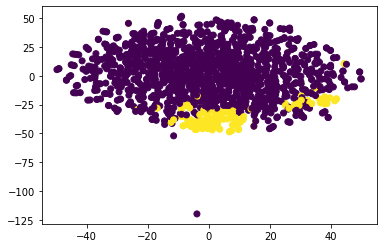

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


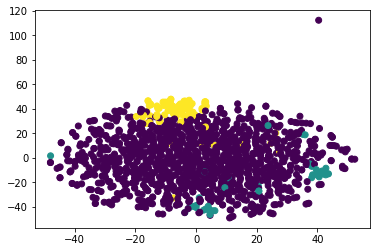

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


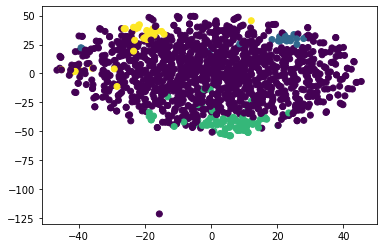

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


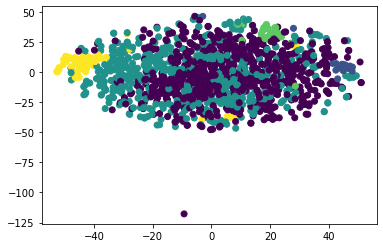

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


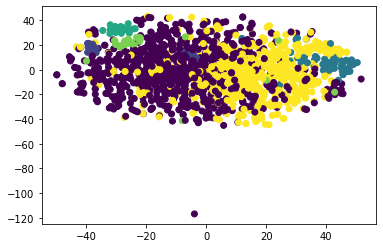

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


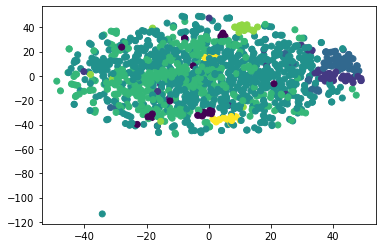

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


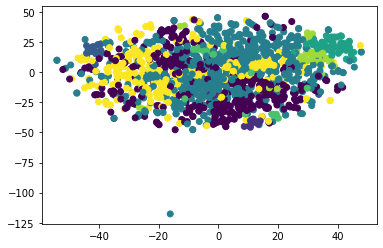

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


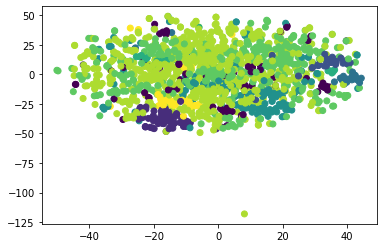

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


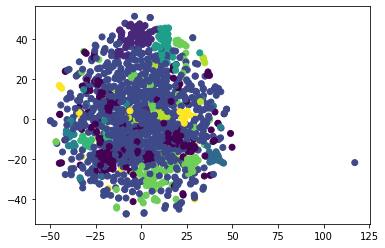

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


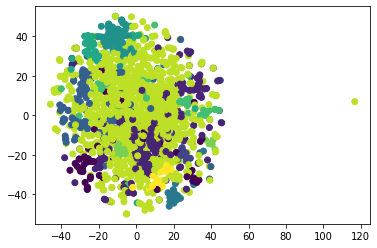

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


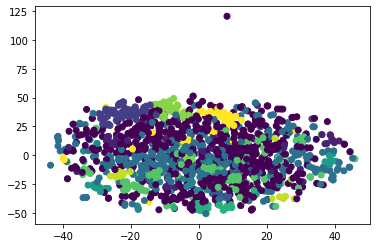

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


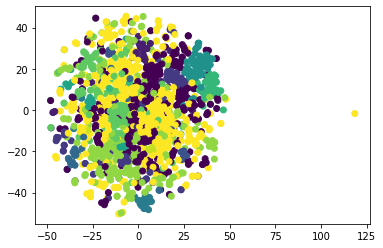

In [ ]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Create a sample dataset
vectorizer = TfidfVectorizer(lowercase=True)
data = vectorizer.fit_transform(data["Text"])

models = []
def processBrownAlgo(n_clusters):
  # Fit the Brown clustering model
  model = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', assign_labels='kmeans')
  model.fit(data)
  models.append(model)

  # Reduce the data to 2 dimensions using t-SNE
  tsne = TSNE(n_components=2)
  reduced_data = tsne.fit_transform(data)

  # Plot the cluster assignments on the reduced data
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model.labels_)
  plt.show()

for x in range(2, 14):
  processBrownAlgo(x)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# # create a bag-of-words representation of the tweets
# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(data['text'])

# get the indices of the most common words in each cluster
for ward in wards:
  for i in range(ward.n_clusters):
    mask = ward.labels_ == i
    words = np.array(vectorizer.get_feature_names())
    print("Cluster {}: {}".format(i, words[np.argsort(X[mask].sum(axis=0).A1)[-10:]]))
  print()

NameError: ignored

In [ ]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(df["Text"])

corpus = [dictionary.doc2bow(doc) for doc in df["Text"]]


print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5041
Number of documents: 1983


In [ ]:
res = {}
s = "metric"
zeus = "zeus"

KeyError: ignored

In [ ]:
import re
from gensim import models, corpora
from gensim.models.coherencemodel import CoherenceModel

# Define a list of tweets
tweets = pd.read_csv("dataset_twitter_filtered_translated.csv")["Text"]

# Extract hashtags from tweets
hashtags = [re.findall(r'#(\w+)', tweet) for tweet in tweets]

# Flatten the list of hashtags
hashtags = [tag for tag_list in hashtags for tag in tag_list]

# Create a dictionary of hashtags
dictionary = corpora.Dictionary([hashtags])

# Create a bag-of-words representation of the hashtags
bow_corpus = [dictionary.doc2bow([hashtag]) for hashtag in hashtags]

# Train the LDA model
lda_model = models.LdaModel(bow_corpus, num_topics=3, passes=200, id2word=dictionary)

# Extract the topics
topics = lda_model.print_topics()

# Print the topics
for topic in topics:
    print(topic)

SyntaxError: ignored

In [5]:
# preprocess Dataset
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

def givePreprocessedDatasetTokenize():
  nltk.download('stopwords')
  nltk.download('punkt')
  pd.set_option('display.max_colwidth', None)

  stop_words = set(stopwords.words('english'))

  stop_words.add('they\'re')
  stop_words.add('here\'s')
  stop_words.add('he\'s')
  stop_words.add('I\'m')
  stop_words.add('really')
  stop_words.add('very')
  stop_words.add('always')
  stop_words.add('whose')
  stop_words.add('always')
  stop_words.add('oh')
  stop_words.add('haha')
  stop_words.add('whatever')
  stop_words.add('jan')
  stop_words.add('gotten')
  stop_words.add('aangkat')
  stop_words.add('haha')
  df = pd.read_csv("dataset_twitter_unique_unmention.csv")

  # lemmatize
  nltk.download('wordnet')
  nltk.download('omw-1.4')
  w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
  lemmatizer = nltk.stem.WordNetLemmatizer()


  df = df.dropna(subset = ['Text'])

  specialSymbols = ['.', '?', ',', '%', '!', ';', '|']
  avoidLemmatizeWords = ['goods', 'Philippines']

  df["Text"] = df["Text"].apply(lambda tweet: tweet.strip().lower().replace('\'', " "))

  for symbol in specialSymbols:
    df["Text"] = df["Text"].apply(lambda tweet: tweet.replace(symbol, " ")) 

  df["Text"] = df["Text"].str.replace('inflation rate', 'inflation_rate')
  df["Text"] = df["Text"].str.replace('\d+', '', regex=True)
  df["Text"] = df["Text"].apply(lambda tweet: w_tokenizer.tokenize(tweet))
  df["Text"] = df["Text"].apply(lambda words: [word for word in words if word not in (stop_words)])
  df["Text"] = df["Text"].apply(lambda words: [word for word in words if len(str(word).strip()) > 2])
  df["Text"] = df["Text"].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
  df["Text"] = df["Text"].apply(lambda words: ' '.join(words))
  return df


In [ ]:
df = givePreprocessedDatasetTokenize()
tweets = df["Text"]

tweets.head(10)

In [ ]:
# savepoint
!pip install -U embedded_topic_model
from embedded_topic_model.utils import preprocessing, embedding
from embedded_topic_model.models.etm import ETM

df = givePreprocessedDatasetTokenize()
tweets = df["Text"]

vocabulary, train_dataset, test_dataset, = preprocessing.create_etm_datasets(
    tweets, 
    min_df=0.01, 
    max_df=0.80,
    train_size=0.80 
)

print('---')
print(len(train_dataset))
print(len(test_dataset))
print('---')

documents = [document for document in tweets]
# Training word2vec embeddings
embeddings_mapping = embedding.create_word2vec_embedding_from_dataset(documents)

for x in range(3,4):
  n_topics = x

  etm_instance = ETM(
    vocabulary,
    batch_size=200,
    num_topics=n_topics,
    epochs=200,
    debug_mode=True,
    embeddings=embeddings_mapping, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
    train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                              # topic embeddings. By default, is False. If 'embeddings' argument
                              # is being passed, this argument must not be True
    eval_perplexity=True
  )

  etm_instance.fit(train_dataset, test_dataset)
  topics = etm_instance.get_topics(15)
  topic_coherence = etm_instance.get_topic_coherence()
  topic_diversity = etm_instance.get_topic_diversity()
  etm_instance.model.eval()

  print('n_topics: %d, coherence_npmi: %.9f, topic_diversity: %.9f' % (etm_instance.num_topics,topic_coherence,topic_diversity))

  for topic in topics:
      print(topic)

  print() 

In [ ]:
from embedded_topic_model.utils import preprocessing, embedding
from embedded_topic_model.models.etm import ETM

dfExample = givePreprocessedDatasetTokenize()
tweetsExample = df["Text"]


vocabularyExample, train_datasetExample, _Example, = preprocessing.create_etm_datasets(
    tweetsExample, 
    min_df=0.01, 
    max_df=0.80, 
)



documents = [document for document in tweets]
# Training word2vec embeddings

etm_instanceExample = ETM(
    vocabulary,
    batch_size=200,
    num_topics=3,
    epochs=200,
    embeddings=embeddings_mapping, # You can pass here the path to a word2vec file or
                                   # a KeyedVectors instance
    train_embeddings=False, # Optional. If True, ETM will learn word embeddings jointly with
                              # topic embeddings. By default, is False. If 'embeddings' argument
                              # is being passed, this argument must not be True
  )

etm_instanceExample.fit()
etm_instanceExample.fit(train_dataset)
etm_instanceExample.model.eval
topics = etm_instance.get_topics(15)
topic_coherence = etm_instance.get_topic_coherence()
topic_diversity = etm_instance.get_topic_diversity()

print('n_topics: %d, coherence_npmi: %.9f, topic_diversity: %.9f' % (etm_instance.num_topics,topic_coherence,topic_diversity))

etm_instanceExample.anneal_lr

for topic in topics:
    print(topic)

print() 

In [ ]:
from sklearn.model_selection import KFold

kdf = givePreprocessedDatasetTokenize()

# Initialize the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=0)
data = kdf["Text"]

print(data.size)
# Iterate over the splits
for train_index, test_index in kf.split(data):
    # Get the training and test data for this split
    X_train, X_test = data[train_index], data[test_index]
    # Train the model on the training data
    # model.fit(X_train, y_train)
    
    # # Evaluate the model on the test data
    # test_score = model.score(X_test, y_test)
    # print("Test score: ", test_score)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

kf = KFold(n_splits=5, shuffle=True, random_state=0)

data = tweets

for train_index, test_index in kf.split(data):
  train_data = [data[i] for i in train_index]
  test_data = [data[i] for i in test_index]

  embeddings_mapping = embedding.create_word2vec_embedding_from_dataset(tweets)

  etm_instance = ETM(
    vocabulary,
    batch_size=200,
    num_topics=3,
    epochs=200,
    embeddings=embeddings_mapping,
    train_embeddings=False,
    
  )
  etm_instance
  etm_model.train(train_data, total_examples=etm_model.corpus_count, epochs=100)
  test_log_loss = log_loss(np.array(test_data), etm_model.get_document_topics(test_data, minimum_probability=0.0))
  print("Test Log Loss: ", test_log_loss)


In [ ]:
from gensim import corpora, models
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

df = givePreprocessedDatasetTokenize()

# Define a list of tweets
tweets = df["Text"]
# tweets = df["Text"].apply(lambda words: ' '.join(words))

# Preprocessing
# Remove stopwords and tokenize the tweets
# stop_words = set(stopwords.words('english'))
# tweets = [[word for word in tweet.lower().split() if word not in stop_words] for tweet in tweets]

# Create a dictionary of words from the tweets
dictionary = corpora.Dictionary(tweets)

# Create a bag-of-words representation of the tweets
bow_corpus = [dictionary.doc2bow(tweet) for tweet in tweets]

# Train the LDA model
lda_model = models.LdaModel(bow_corpus, num_topics=2, id2word=dictionary)

# Extract the topics
topics = lda_model.print_topics()

# Print the topics
for topic in topics:
    print(topic)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


(0, '0.068*"inflation" + 0.013*"high" + 0.009*"price" + 0.006*"rate" + 0.006*"philippine" + 0.006*"inflation_rate" + 0.006*"still" + 0.005*"expensive" + 0.005*"increase" + 0.004*"good"')
(1, '0.048*"inflation" + 0.013*"inflation_rate" + 0.012*"price" + 0.009*"bbm" + 0.006*"philippine" + 0.006*"high" + 0.006*"rate" + 0.005*"country" + 0.004*"people" + 0.004*"increase"')


In [ ]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 200
passes = 50
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
# temp = dictionary[0]  # This is only to "load" the dictionary.
# id2word = dictionary.id2token

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import CoherenceModel, Word2Vec
from gensim.corpora import Dictionary

dictionary = Dictionary(tweets)
corpus = [dictionary.doc2bow(doc) for doc in tweets]
models = []

# Train a Word2Vec model
w2v_model = Word2Vec(tweets, size=100, window=5, min_count=2, workers=4)

for x in range(2, 17):
  num_topics = x
  model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    # alpha='auto',
    # eta='auto',
    num_topics=num_topics,
    passes=passes,
    w2v_model=w2v_model
    )
  models.append(model)
  coherence_model = CoherenceModel(model=model, texts=tweets, dictionary=dictionary, coherence='c_npmi')

  # Get the coherence score
  coherence_score = coherence_model.get_coherence()
  print('%d,  %.9f' % (num_topics, coherence_score))
  print()

                                   
  # model.print_topics(num_words=5)

  # top_topics = model.top_topics(corpus)

  # print(model.top_topics(corpus))
  # avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
  # print('Average topic coherence: %.4f.' % avg_topic_coherence)

# from pprint import pprint
# pprint(top_topics)

In [ ]:
!pip install lda2vec
from lda2vec import preprocess, Corpus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for lda2vec: filename=lda2vec-0.16.10-py3-none-any.whl size=14432 sha256=de2529952a2a034f20e975390aae731baf592e9bae998dd8700fa74190024b13
  Stored in directory: /root/.cache/pip/wheels/74/d3/19/9a711a19d209476de11d2b57df549fad077d2a06e4c391f0b0
Successfully built lda2vec


ModuleNotFoundError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import pairwise_distances

# sampleVectorizer = TfidfVectorizer(lowercase=True,stop_words=stopwords,)
# X = sampleVectorizer.fit_transform(
    # df["Text"].apply(lambda tweet: " ".join([word for word in tweet]))
# )

# clt = AffinityPropagation(damping=0.9, max_iter=100, affinity="jaccard")
# model = clt.fit(X)

# model.labels_
# plt.scatter(X[:,0].toarray(), X[:,1].toarray(), c=clt.fit_predict(X))
# plt.show()

from sklearn.cluster import AffinityPropagation
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

length = df.Text.size
tweets = df.Text.apply(lambda tweet: " ".join([word for word in tweet]))

vectorizer = CountVectorizer(binary=True)
matrix = vectorizer.fit_transform(tweets).toarray()
# similarity_matrix = jaccard_score(matrix, matrix, average=None)
similarity_matrix = pairwise_distances(matrix, metric='jaccard', n_jobs=-1)

# Define a similarity matrix using Jaccard similarity
# similarity_matrix = np.zeros((length, length),dtype=object)
# print(tweets[i])
# for i in range(length):
#     for j in range(i, length):
#         similarity_matrix[i, j] = jaccard_score(tweets[i], tweets[j], average=None)
#         similarity_matrix[j, i] = similarity_matrix[i, j]

# Create an AffinityPropagation instance and fit the model
af = AffinityPropagation(affinity='precomputed', damping=0.5)
# similarity_matrix = np.reshape(similarity_matrix, (matrix.shape[0], matrix.shape[0]))

af.fit(similarity_matrix)

# Get the cluster labels for each review
labels = af.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [ ]:
!pip install nltk

In [ ]:
# brown algorithm

# from nltk.cluster import util, brown
from sklearn.cluster import Brown


# Define a list of sentences (short texts)
sentences = ["This is a sentence", "Another sentence", "Yet another one", "And one more sentence"]

# Create a word-context matrix from the sentences
word_context_matrix = util.bag_of_words_in_context(sentences, context_window_size=2)

# Define the linkage function for hierarchical clustering
linkage_function = lambda x, y, wxy, wx, wy: wxy / (wx + wy)

# Perform the clustering
clusters = Brown.hierarchical_clustering(word_context_matrix, linkage=linkage_function)

# Print the clusters
print(clusters)


ImportError: ignored

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


ValueError: ignored

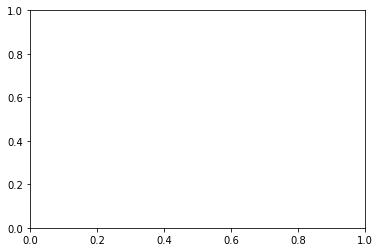

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AffinityPropagation

# list of short texts
texts = ["this is a text snippet", "this is another text snippet", "this is yet another text snippet"]

# create a CountVectorizer object
vectorizer = CountVectorizer(binary=True)

# convert the texts to a binary matrix
matrix = vectorizer.fit_transform(texts).toarray()

# calculate the Jaccard similarity score
similarity_matrix = pairwise_distances(matrix, metric='jaccard')

# perform Affinity Propagation
affinity_propagation = AffinityPropagation(affinity='precomputed', damping=0.5)
affinity_propagation.fit(similarity_matrix)

# retrieve the clusters
clusters = affinity_propagation.labels_

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matrix)
x = pca.components_[0]
y = pca.components_[1]

plt.scatter(x, y, c=pca.label)
plt.show()

ValueError: ignored

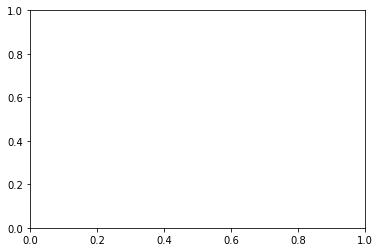

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matrix)
x = pca.components_[0]
y = pca.components_[1]

plt.scatter(x, y, c=labels)
plt.show()


In [ ]:

# Train LDA model.
from gensim.models import LdaModel
from gensim.models import CoherenceModel

k_topics_max = 12
lda_models = []


# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

# Set training parameters.
num_topics = 10
chunksize =  1000
passes = 10
iterations = 100
eval_every = None  # Don't evaluate model perplexity, takes too much time.

for x_topics in range(2, k_topics_max):
  model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    alpha='auto',
    eta='auto',
    num_topics=x_topics,
    passes=passes,
    eval_every=eval_every,
    random_state=100
    # chunksize=100
  )
  
  lda_models.append(model)
  top_topics = model.top_topics(corpus)
  print(top_topics)
  avg_topic_coherence = sum([t[1] for t in top_topics]) / x_topics
  # print('Average topic coherence: %.4f.' % avg_topic_coherence)
  coherence_model_lda = CoherenceModel(
    model=model, texts=df["Text"], dictionary=dictionary, coherence='u_mass')

  coherence_lda = coherence_model_lda.get_coherence()

  print('Coherence Score: ', coherence_lda)
  print(w)



# from pprint import pprint
# pprint(top_topics)

[([(0.0756609, 'inflation'), (0.019963874, 'rate'), (0.015222414, 'december'), (0.012490258, 'price'), (0.009626093, 'philippine'), (0.009165899, 'high'), (0.008105718, 'peso'), (0.007895254, 'year'), (0.0063477145, 'increase'), (0.0058910414, 'psa'), (0.0056836293, 'food'), (0.0050917245, 'country'), (0.00476131, 'united_states'), (0.0045566796, 'said'), (0.0045404187, 'month'), (0.004491071, 'higher'), (0.004367552, 'november'), (0.0040744385, 'highest'), (0.004037471, 'since'), (0.0038376397, 'good')], -2.9171309123771345), ([(0.062828995, 'inflation'), (0.010287697, 'rate'), (0.008841668, 'price'), (0.007356293, 'philippine'), (0.007283057, 'still'), (0.006553674, 'high'), (0.0056781005, 'bbm'), (0.004838154, 'country'), (0.004776126, 'peso'), (0.0047592893, 'also'), (0.004572967, 'people'), (0.0045188437, 'year'), (0.004073947, 'even'), (0.003790017, 'said'), (0.0037336638, 'time'), (0.0036761211, 'increase'), (0.0035990123, 'expensive'), (0.003585721, 'united_states'), (0.0032740

In [ ]:
model.print_topics()

[(0,
  '0.089*"inflation" + 0.016*"rate" + 0.011*"price" + 0.010*"like" + 0.009*"philippine" + 0.008*"still" + 0.007*"time" + 0.006*"increase" + 0.006*"bbm" + 0.005*"high"'),
 (1,
  '0.067*"inflation" + 0.026*"price" + 0.020*"rate" + 0.018*"december" + 0.012*"year" + 0.012*"high" + 0.010*"food" + 0.010*"increase" + 0.010*"data" + 0.010*"philippine"'),
 (2,
  '0.061*"inflation" + 0.009*"bbm" + 0.009*"price" + 0.008*"rate" + 0.006*"like" + 0.006*"still" + 0.006*"country" + 0.006*"philippine" + 0.006*"year" + 0.005*"one"'),
 (3,
  '0.062*"inflation" + 0.012*"philippine" + 0.012*"rate" + 0.011*"still" + 0.011*"peso" + 0.008*"country" + 0.008*"high" + 0.007*"go" + 0.006*"want" + 0.006*"even"'),
 (4,
  '0.061*"inflation" + 0.019*"rate" + 0.016*"price" + 0.010*"december" + 0.009*"ng" + 0.009*"report" + 0.008*"food" + 0.007*"na" + 0.007*"sa" + 0.007*"also"'),
 (5,
  '0.075*"inflation" + 0.021*"rate" + 0.015*"high" + 0.010*"peso" + 0.008*"year" + 0.007*"country" + 0.006*"philippine" + 0.006*"on